<a href="https://colab.research.google.com/github/Farhanahoque251/Drug-Discovery-with-Python/blob/main/CoronaLipi_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install chembl_webresource_client rdkit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 495.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.32.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [ ]:
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
# Search for compounds related to coronavirus in ChEMBL
target_query = new_client.target
target = target_query.filter(target_synonym__icontains='coronavirus').only('target_chembl_id')[0]

# Get bioactivities for the target
activity = new_client.activity
res = activity.filter(target_chembl_id=target['target_chembl_id'], pchembl_value__isnull=False).filter(standard_type="IC50")

# Collect unique compound IDs
compounds = {x['molecule_chembl_id'] for x in res}

# Fetch molecule details and apply Lipinski's Rule of Five
molecules = []
for compound_id in compounds:
    mol_data = new_client.molecule.filter(molecule_chembl_id=compound_id).only('molecule_structures')
    smiles = mol_data[0]['molecule_structures']['canonical_smiles']
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Descriptors.MolWt(mol)  # Updated line
        hbd = Lipinski.NumHDonors(mol)
        hba = Lipinski.NumHAcceptors(mol)
        clogp = Chem.Crippen.MolLogP(mol)
        if mw <= 500 and hbd <= 5 and hba <= 10 and clogp <= 5:
            molecules.append({'SMILES': smiles, 'MolecularWeight': mw, 'HBD': hbd, 'HBA': hba, 'CLogP': clogp})

# Print or process the filtered molecules
for molecule in molecules:
    print(molecule)

{'SMILES': 'Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1', 'MolecularWeight': 278.307, 'HBD': 0, 'HBA': 3, 'CLogP': 3.2910200000000023}
{'SMILES': 'O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1', 'MolecularWeight': 272.69100000000003, 'HBD': 1, 'HBA': 3, 'CLogP': 3.435500000000001}
{'SMILES': 'C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C', 'MolecularWeight': 296.366, 'HBD': 0, 'HBA': 3, 'CLogP': 3.4433000000000025}
{'SMILES': 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21', 'MolecularWeight': 293.34700000000004, 'HBD': 0, 'HBA': 3, 'CLogP': 3.6308000000000016}
{'SMILES': 'Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21', 'MolecularWeight': 281.271, 'HBD': 0, 'HBA': 5, 'CLogP': 1.89262}
{'SMILES': 'O=C(Sc1nnc(C(F)(F)F)[nH]1)c1ccc(C#Cc2ccccc2)o1', 'MolecularWeight': 363.3200000000001, 'HBD': 1, 'HBA': 5, 'CLogP': 3.748800000000002}
{'SMILES': 'Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C', 'MolecularWeight': 294.35, 'HBD': 0, 'HBA': 3, 'CLogP': 4.247920000000003}
{'SMILES': 'Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)CO', 'Mol

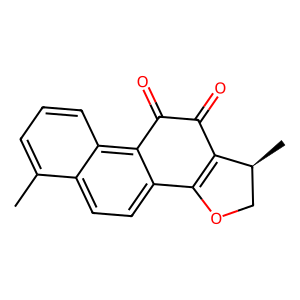

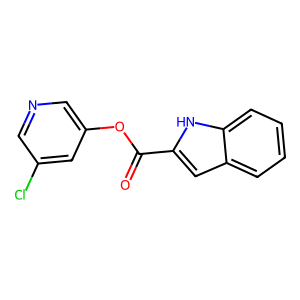

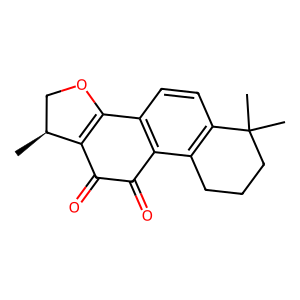

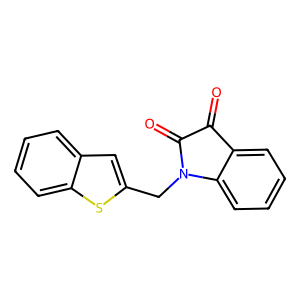

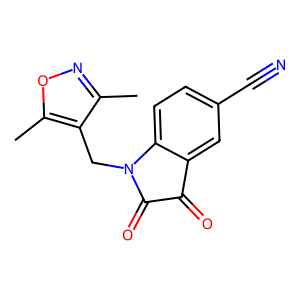

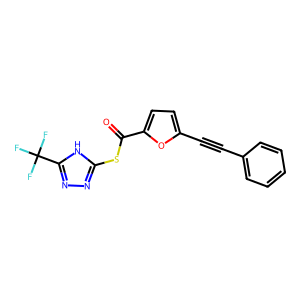

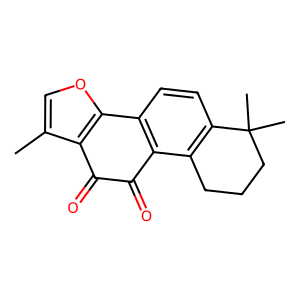

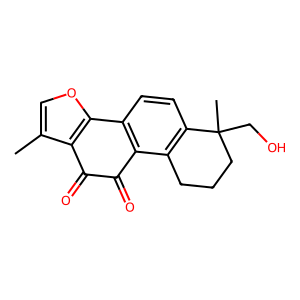

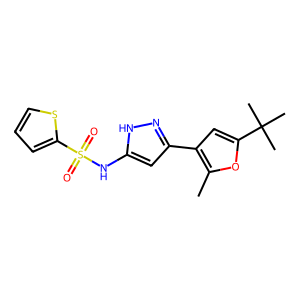

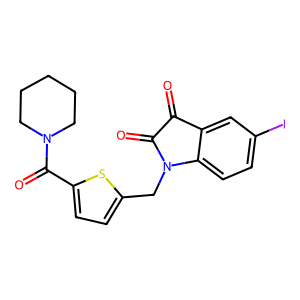

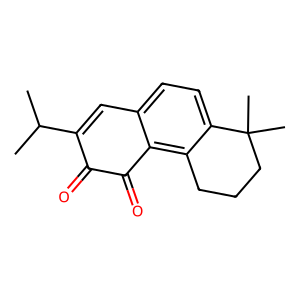

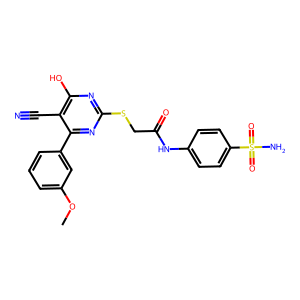

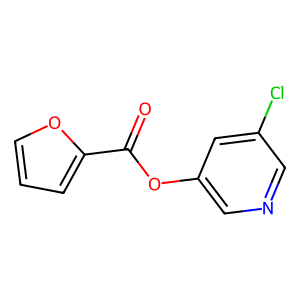

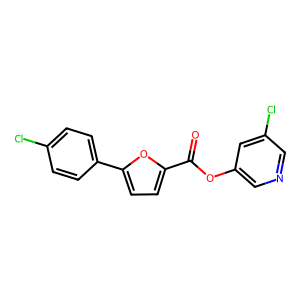

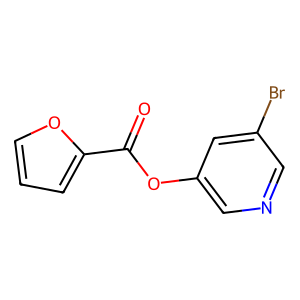

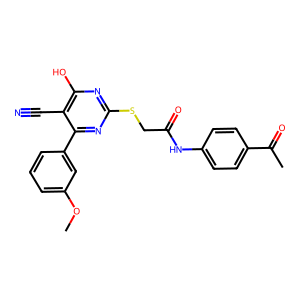

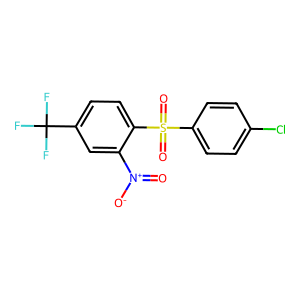

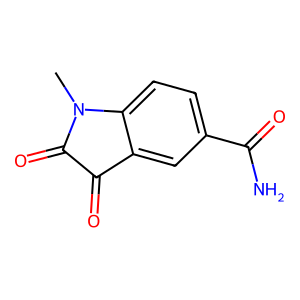

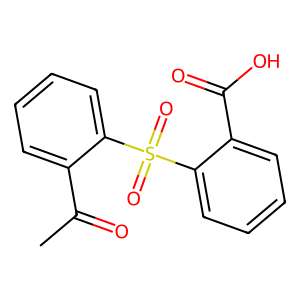

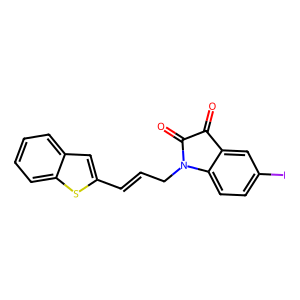

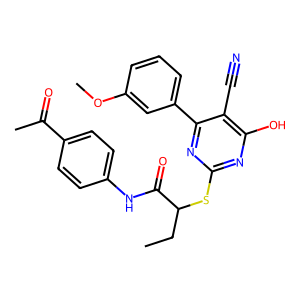

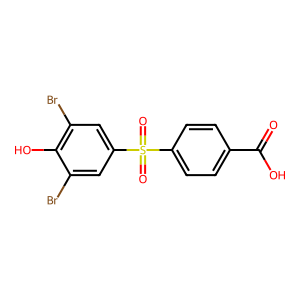

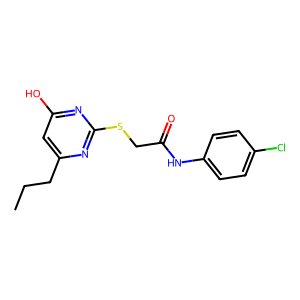

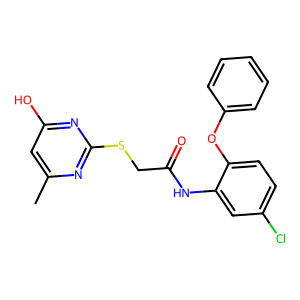

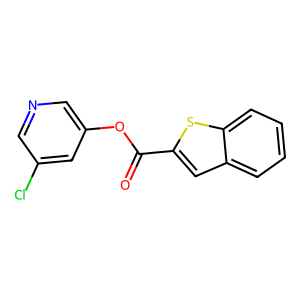

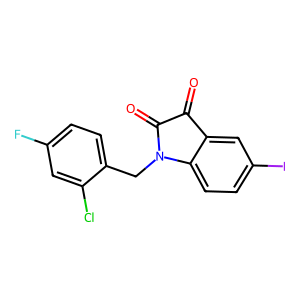

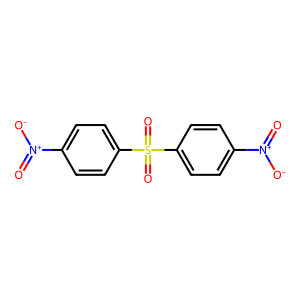

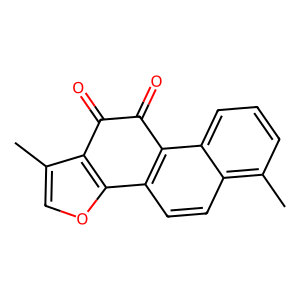

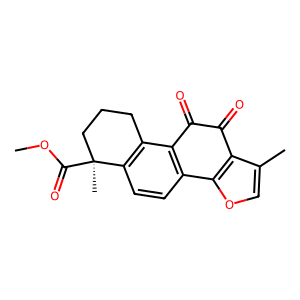

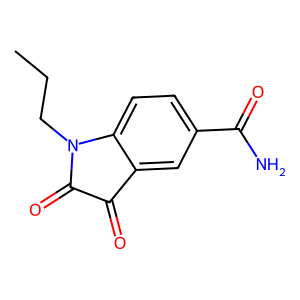

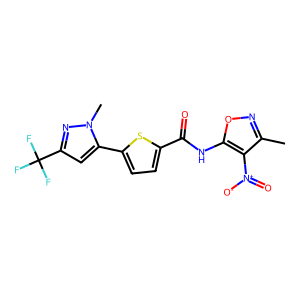

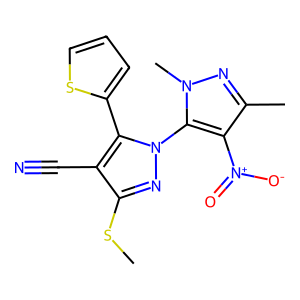

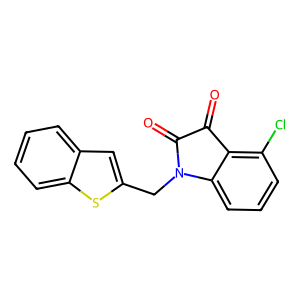

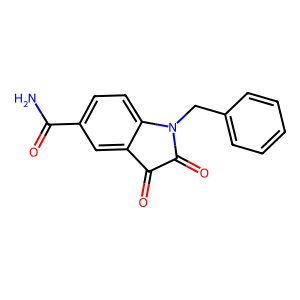

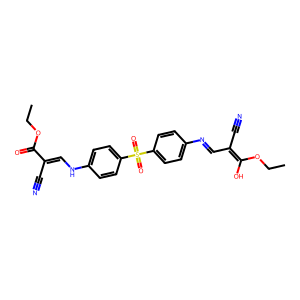

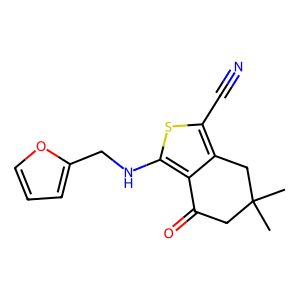

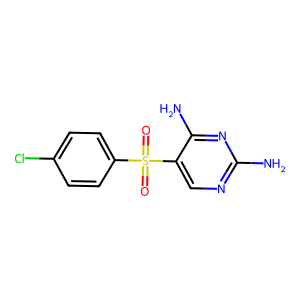

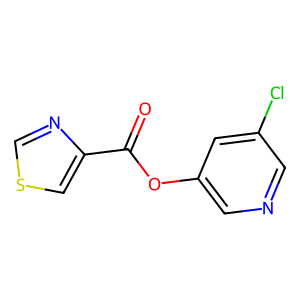

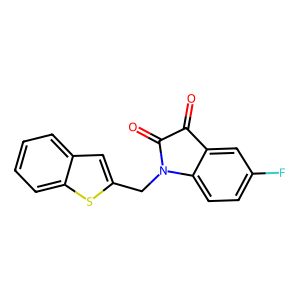

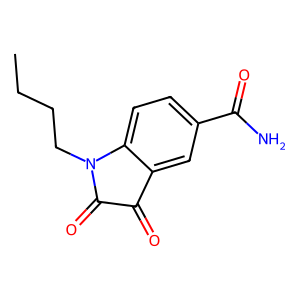

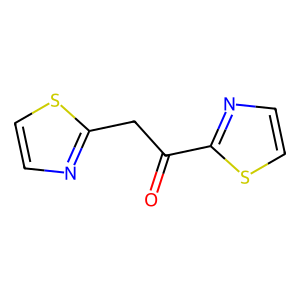

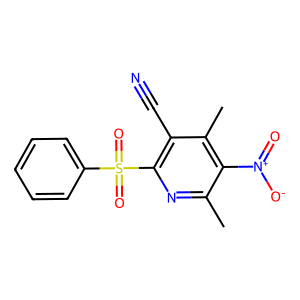

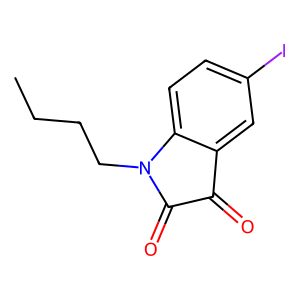

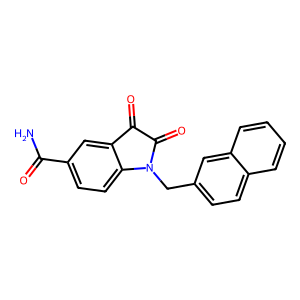

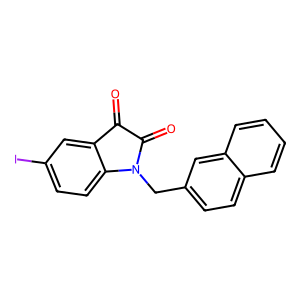

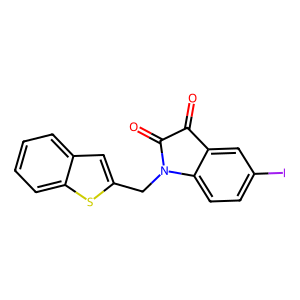

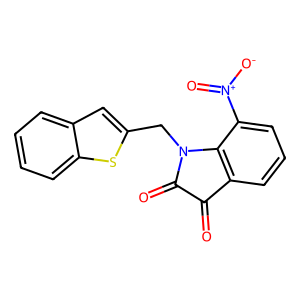

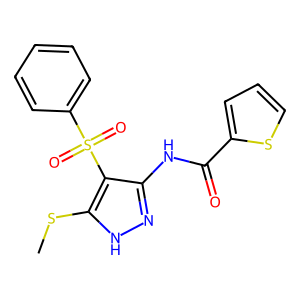

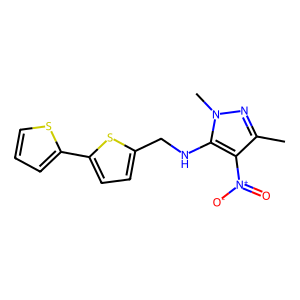

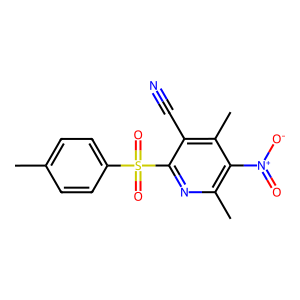

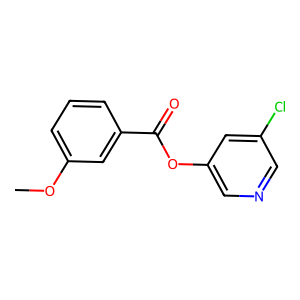

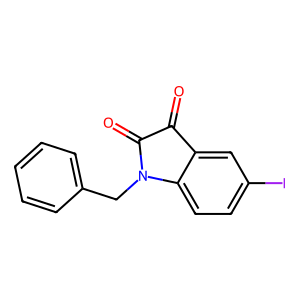

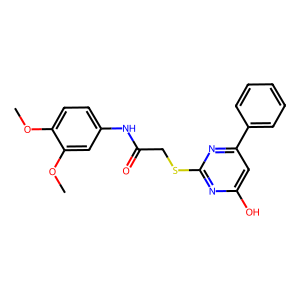

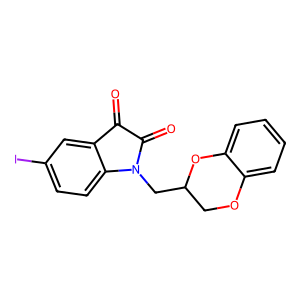

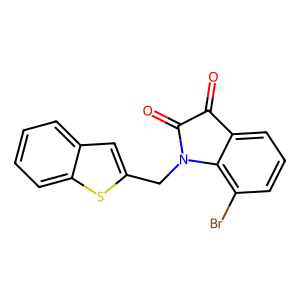

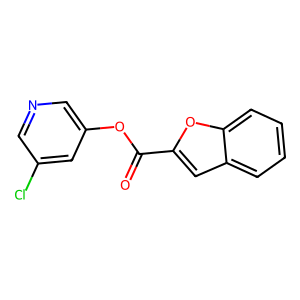

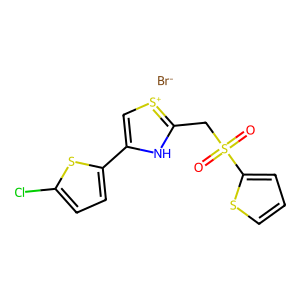

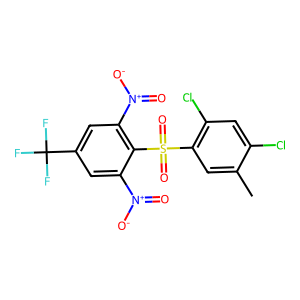

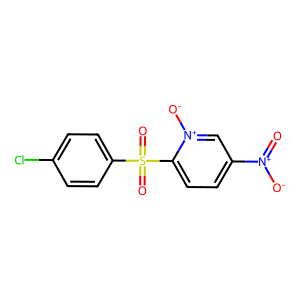

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Assuming 'molecules' contains the filtered molecules from earlier processing
# Let's create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(mol['SMILES']) for mol in molecules]

# Generate images of the molecules
images_2D = [Draw.MolToImage(mol) for mol in mols]

# Show the images
for img in images_2D:
    display(img)

In [ ]:
# Count of molecules meeting criteria
num_molecules = len(molecules)
print(f"Number of molecules meeting Lipinski's Rule of Five criteria: {num_molecules}")

# To get the number of rows and columns
num_rows = num_molecules
num_columns = len(molecules[0])  # Assuming all molecules have the same columns
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")

# To display the molecules data
for molecule in molecules:
    print(molecule)

Number of molecules meeting Lipinski's Rule of Five criteria: 59
Number of rows: 59, Number of columns: 5
{'SMILES': 'Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1', 'MolecularWeight': 278.307, 'HBD': 0, 'HBA': 3, 'CLogP': 3.2910200000000023}
{'SMILES': 'O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1', 'MolecularWeight': 272.69100000000003, 'HBD': 1, 'HBA': 3, 'CLogP': 3.435500000000001}
{'SMILES': 'C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C', 'MolecularWeight': 296.366, 'HBD': 0, 'HBA': 3, 'CLogP': 3.4433000000000025}
{'SMILES': 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21', 'MolecularWeight': 293.34700000000004, 'HBD': 0, 'HBA': 3, 'CLogP': 3.6308000000000016}
{'SMILES': 'Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21', 'MolecularWeight': 281.271, 'HBD': 0, 'HBA': 5, 'CLogP': 1.89262}
{'SMILES': 'O=C(Sc1nnc(C(F)(F)F)[nH]1)c1ccc(C#Cc2ccccc2)o1', 'MolecularWeight': 363.3200000000001, 'HBD': 1, 'HBA': 5, 'CLogP': 3.748800000000002}
{'SMILES': 'Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C', 'MolecularWeight': 294.35, '

In [ ]:
import pandas as pd

# Assuming 'molecules' contains the filtered data
data = {
    'SMILES': [mol['SMILES'] for mol in molecules],
    'MolecularWeight': [mol['MolecularWeight'] for mol in molecules],
    'HBD': [mol['HBD'] for mol in molecules],
    'HBA': [mol['HBA'] for mol in molecules],
    'CLogP': [mol['CLogP'] for mol in molecules]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                               SMILES  MolecularWeight  HBD  \
0       Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1          278.307    0   
1                  O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1          272.691    1   
2         C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C          296.366    0   
3                 O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21          293.347    0   
4              Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21          281.271    0   
5      O=C(Sc1nnc(C(F)(F)F)[nH]1)c1ccc(C#Cc2ccccc2)o1          363.320    1   
6             Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C          294.350    0   
7            Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)CO          310.349    1   
8    Cc1oc(C(C)(C)C)cc1-c1cc(NS(=O)(=O)c2cccs2)[nH]n1          365.480    2   
9     O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21          480.327    0   
10             CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C          282.383    0   
11  COc1cccc(-c2nc(SCC(=O)Nc3ccc(S(N)(=O)=O)cc3)nc..

In [ ]:
!pip install py3Dmol

In [ ]:
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Lipinski
import py3Dmol
from rdkit.Chem import AllChem

# Your code to fetch and process molecules goes here

# Search for compounds related to coronavirus in ChEMBL
target_query = new_client.target
target = target_query.filter(target_synonym__icontains='coronavirus').only('target_chembl_id')[0]

# Get bioactivities for the target
activity = new_client.activity
res = activity.filter(target_chembl_id=target['target_chembl_id'], pchembl_value__isnull=False).filter(standard_type="IC50")

# Collect unique compound IDs
compounds = {x['molecule_chembl_id'] for x in res}

# Fetch molecule details and apply Lipinski's Rule of Five
molecules = []
for compound_id in compounds:
    mol_data = new_client.molecule.filter(molecule_chembl_id=compound_id).only('molecule_structures')
    smiles = mol_data[0]['molecule_structures']['canonical_smiles']
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Chem.Descriptors.MolWt(mol)
        hbd = Lipinski.NumHDonors(mol)
        hba = Lipinski.NumHAcceptors(mol)
        clogp = Chem.Crippen.MolLogP(mol)
        if mw <= 500 and hbd <= 5 and hba <= 10 and clogp <= 5:
            molecules.append({'SMILES': smiles, 'MolecularWeight': mw, 'HBD': hbd, 'HBA': hba, 'CLogP': clogp})

# Generate 3D conformers and visualize the first few molecules
def generate_3d_conformer(molecule):
    m = Chem.AddHs(molecule)
    AllChem.EmbedMolecule(m, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(m)
    return m

for i, molecule in enumerate(molecules[:5]):
    mol = Chem.MolFromSmiles(molecule['SMILES'])
    mol_3d = generate_3d_conformer(mol)

    # Convert RDKit Mol object to PDB format
    pdb_block = Chem.MolToPDBBlock(mol_3d)

    # Visualize using Py3Dmol
    viewer = py3Dmol.view(width=300, height=300)
    viewer.addModel(pdb_block, 'pdb')
    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    print(f"Molecule {i+1} - SMILES: {molecule['SMILES']}")
    viewer.show()

Molecule 1 - SMILES: Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule 2 - SMILES: O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule 3 - SMILES: C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule 4 - SMILES: O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule 5 - SMILES: Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol